In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data_exp = pd.read_csv("Expenses - Sheet1.csv")
data_exp.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


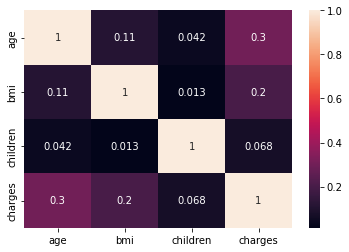

In [3]:
# Finding coorelation between different features.
ax = sns.heatmap(data_exp.corr(), annot=True)

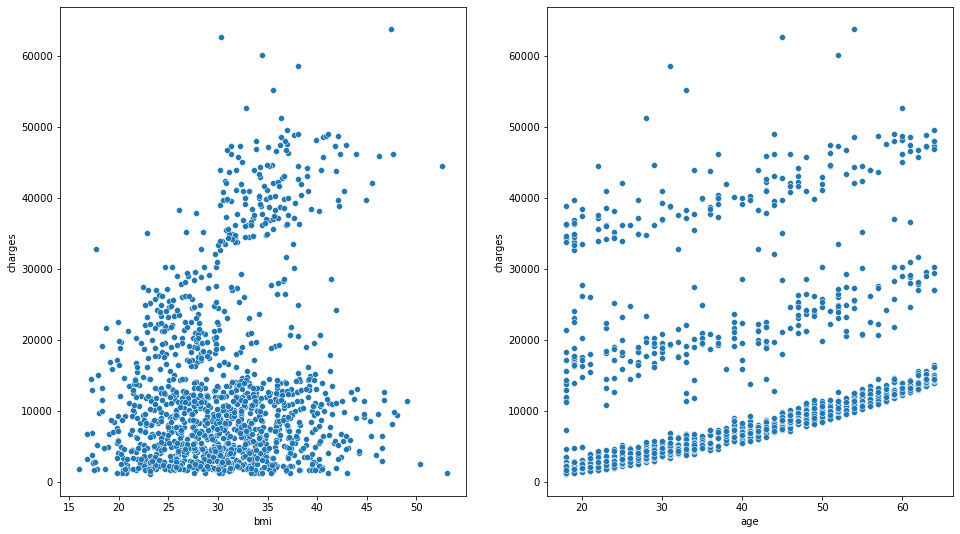

In [4]:
# From coorelation heatmap we can see that the highest coorelation is between bmi and charges
# Checking the distribution of data between two highly related features.
fig, axs = plt.subplots(1, 2, figsize=(16, 9), squeeze=False)
sns.scatterplot(x=data_exp['bmi'], y=data_exp['charges'], ax=axs[0,0])
sns.scatterplot(x=data_exp['age'], y=data_exp['charges'], ax=axs[0,1])
plt.show()

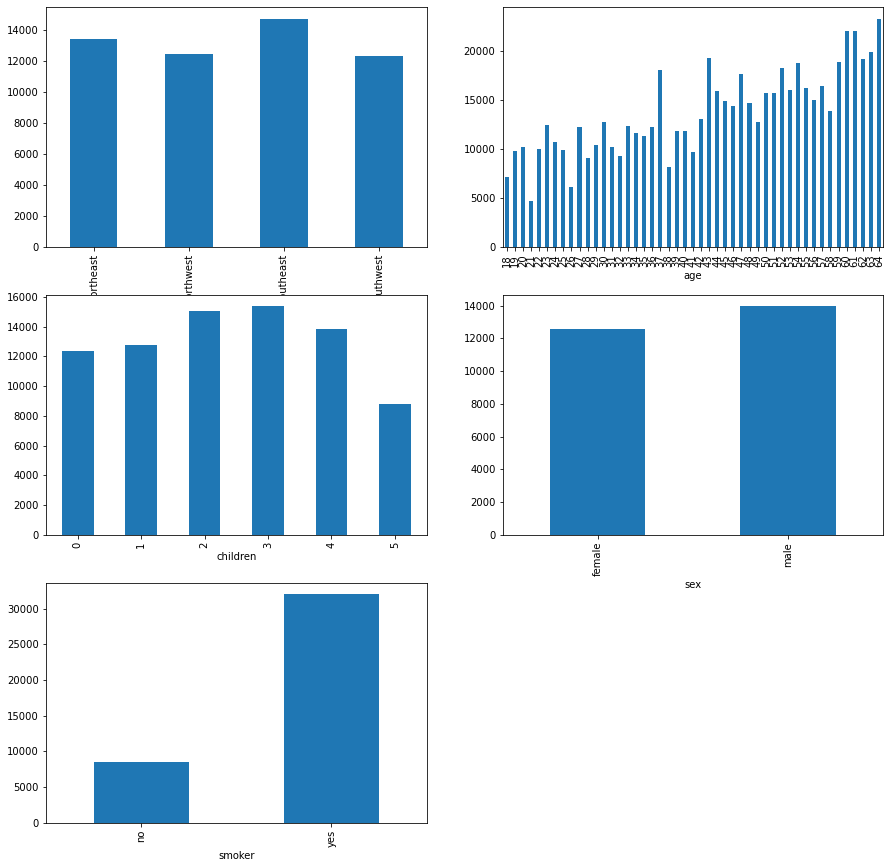

In [5]:
# Mean Target = Charges by each Categorical Variable
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
data_exp.groupby('region')['charges'].mean().plot.bar(ax=axs[0,0])
data_exp.groupby('age')['charges'].mean().plot.bar(ax=axs[0,1])
data_exp.groupby('children')['charges'].mean().plot.bar(ax=axs[1,0])
data_exp.groupby('sex')['charges'].mean().plot.bar(ax=axs[1,1])
data_exp.groupby('smoker')['charges'].mean().plot.bar(ax=axs[2,0])
axs[2, 1].set_visible(False)
plt.show()

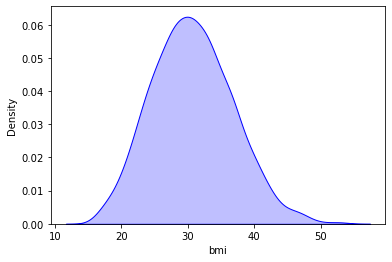

In [6]:
sns.kdeplot(data=data_exp['bmi'], shade=True, color='blue')
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

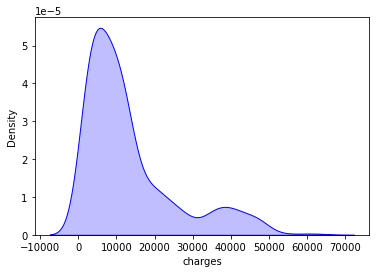

In [7]:
sns.kdeplot(data=data_exp['charges'], shade=True, color='blue')

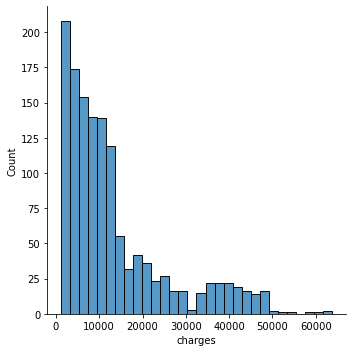

In [8]:
sns.displot(data_exp['charges'], kde=False)
plt.show()

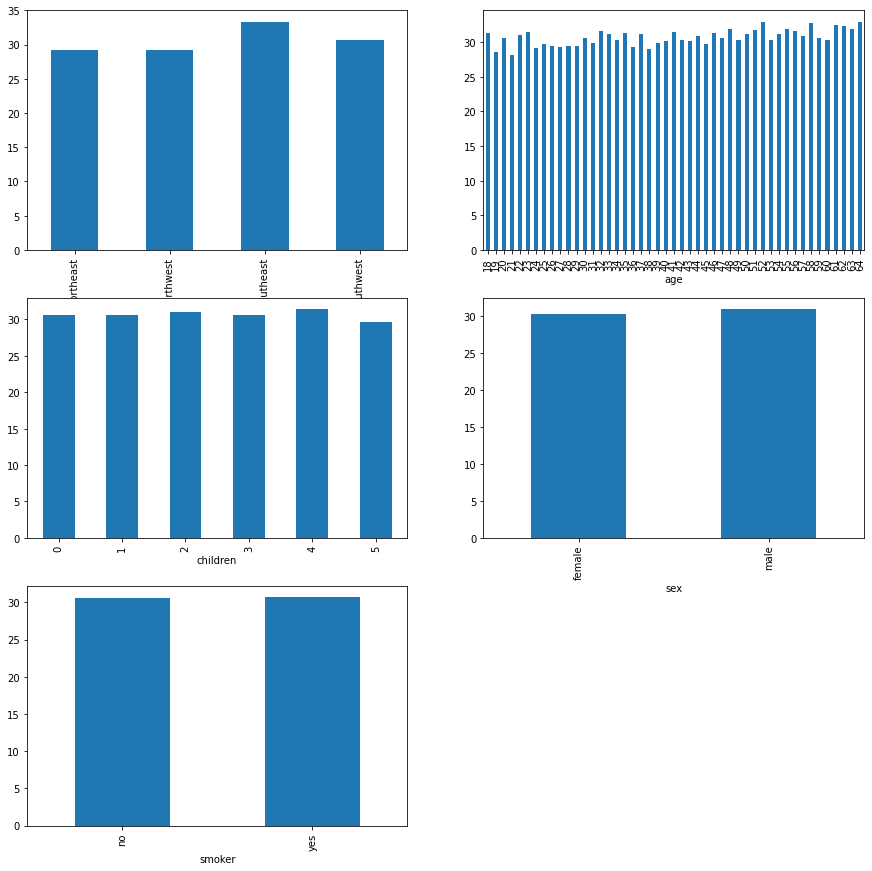

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
data_exp.groupby('region')['bmi'].mean().plot.bar(ax=axs[0,0])
data_exp.groupby('age')['bmi'].mean().plot.bar(ax=axs[0,1])
data_exp.groupby('children')['bmi'].mean().plot.bar(ax=axs[1,0])
data_exp.groupby('sex')['bmi'].mean().plot.bar(ax=axs[1,1])
data_exp.groupby('smoker')['bmi'].mean().plot.bar(ax=axs[2,0])
axs[2, 1].set_visible(False)
plt.show()

In [10]:
print("Sex Values:", data_exp['sex'].value_counts())
print("Smoker Values:", data_exp['smoker'].value_counts())
print("Region Values:", data_exp['region'].value_counts())

Sex Values: male      676
female    662
Name: sex, dtype: int64
Smoker Values: no     1064
yes     274
Name: smoker, dtype: int64
Region Values: southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [11]:
# Encoding categorical features data variables.
encoded_data = pd.get_dummies(data_exp, columns = ['sex', 'smoker', 'region'])
encoded_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.920,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.552,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.462,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.470,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.855,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.550,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.981,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.834,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.945,1,0,1,0,0,0,0,1


In [12]:
# Getting rid of dummy variable trap.
encoded_data.drop(['sex_female', 'smoker_no', 'region_northeast'], axis=1, inplace=True)
encoded_data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.920,0,1,0,0,1
1,18,33.770,1,1725.552,1,0,0,1,0
2,28,33.000,3,4449.462,1,0,0,1,0
3,33,22.705,0,21984.470,1,0,1,0,0
4,32,28.880,0,3866.855,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.550,1,0,1,0,0
1334,18,31.920,0,2205.981,0,0,0,0,0
1335,18,36.850,0,1629.834,0,0,0,1,0
1336,21,25.800,0,2007.945,0,0,0,0,1


In [13]:
X = encoded_data.drop('charges', axis=1)
y = encoded_data['charges']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Applying GradientBoostingRegressor as it was giving me the best results.
gbr = GradientBoostingRegressor(n_estimators = 180, max_depth = 2, random_state=0)

In [16]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=180, random_state=0)

In [17]:
y_pred = gbr.predict(X_test)

In [18]:
RMSE = MSE(y_test, y_pred) ** (1 / 2)
RMSE

3974.5825100458896